In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [4]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))  # fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.4))  # Generalizing (avoiding overfitting)
model.add(Dense(64))  # fully connect ANN Network
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid')) #softmax for multiclass, linear for regress

model.compile(loss='binary_crossentropy', # categorical_entropy
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [13]:
batch_size = 16

# this is the augmentation configuration use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'car_people_image/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'car_people_image/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 1954 images belonging to 2 classes.
Found 285 images belonging to 2 classes.


In [14]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1602 // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=400 // batch_size)
#model.save_weights('first_try2.h5')  # always save your weights after training or during training

Epoch 1/15
100/100 [==============================] - 45s 451ms/step - loss: 0.5473 - accuracy: 0.7711 - val_loss: 0.6663 - val_accuracy: 0.6982
Epoch 2/15
100/100 [==============================] - 39s 391ms/step - loss: 0.5551 - accuracy: 0.7673
Epoch 3/15
100/100 [==============================] - 42s 416ms/step - loss: 0.5478 - accuracy: 0.7699
Epoch 4/15
100/100 [==============================] - 42s 415ms/step - loss: 0.5527 - accuracy: 0.7686
Epoch 5/15
100/100 [==============================] - 41s 413ms/step - loss: 0.5384 - accuracy: 0.7762
Epoch 6/15
100/100 [==============================] - 41s 409ms/step - loss: 0.5444 - accuracy: 0.7686
Epoch 7/15
100/100 [==============================] - 42s 423ms/step - loss: 0.5449 - accuracy: 0.7800
Epoch 8/15
100/100 [==============================] - 41s 412ms/step - loss: 0.5458 - accuracy: 0.7724
Epoch 9/15
100/100 [==============================] - 40s 395ms/step - loss: 0.5672 - accuracy: 0.7667
Epoch 10/15
100/100 [==========

In [15]:
model.save_weights('my_model2_at_15_epocs.h5')  # always save your weights after training or during training

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img = load_img('image_000000028.jpg')  # this is a PIL image
x = img_to_array(img.resize([150,150]))  # this is a Numpy array with shape ( 150, 150,3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 150, 150,3)

In [41]:
x.shape

(1, 150, 150, 3)

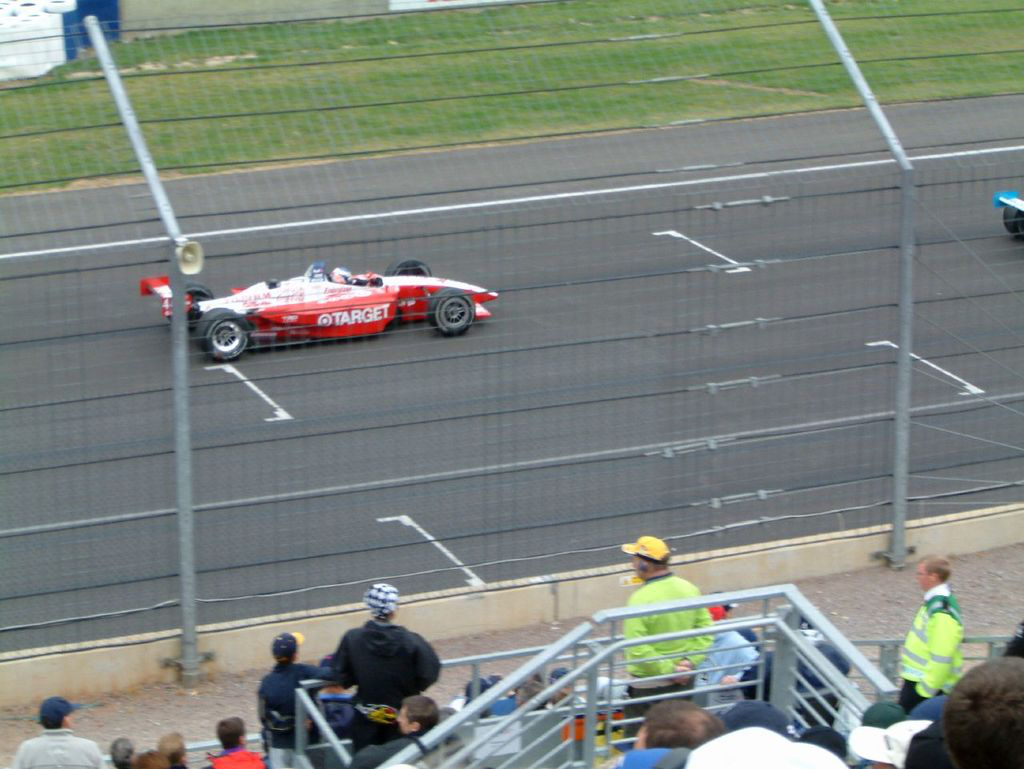

In [42]:
img

In [43]:
if (model.predict_classes(x)==0):
    print ("It is a car")
else:
    print ("It is a people")


It is a car
